# Challenge 3

In [2]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Import the titanic file. Name your dataset `titanic`.

In [5]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [6]:
df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [15]:
df.select_dtypes(include=np.number).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [21]:
# include='category' returns nothing
df.select_dtypes(exclude=np.number).columns

Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [39]:
plt.style.use('classic')
plt.rcParams['figure.figsize'] = [12, 6]

#### Use the appropriate visulalization to show the distribution of the column `Age`

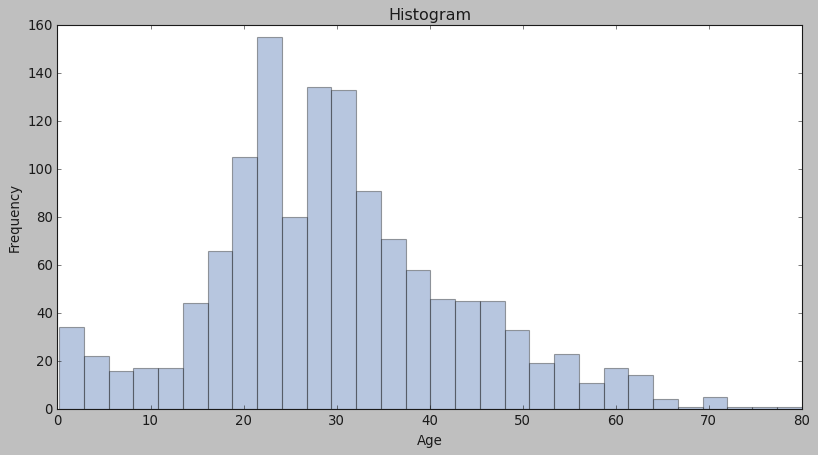

In [67]:
sns.distplot(df.Age,kde=False)
plt.title('Histogram')
plt.ylabel('Frequency');

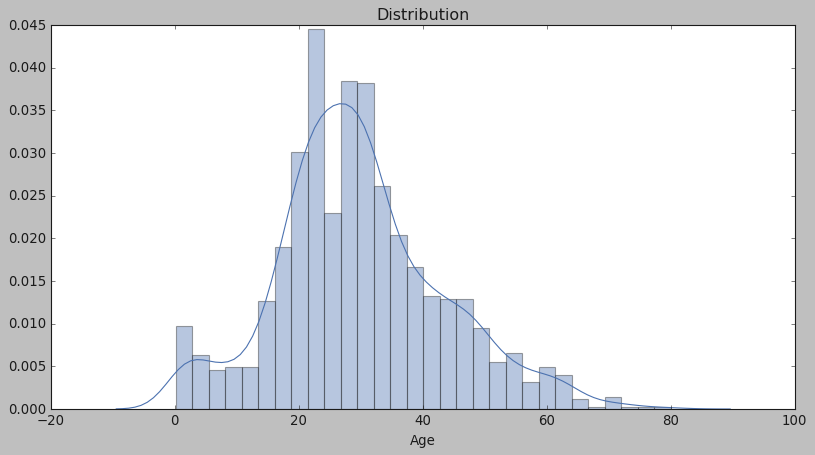

In [65]:
sns.distplot(df.Age,kde=True)
plt.title('Distribution');

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

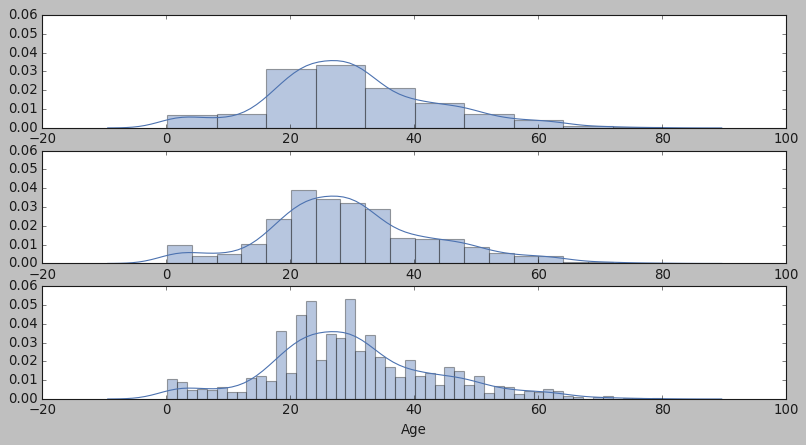

In [108]:
fig,ax=plt.subplots(3,1,sharex=False,sharey=True)
sns.distplot(df.Age,bins=10,kde=True,ax=ax[0])
sns.distplot(df.Age,bins=20,kde=True,ax=ax[1])
sns.distplot(df.Age,bins=50,kde=True,ax=ax[2])
plt.show()

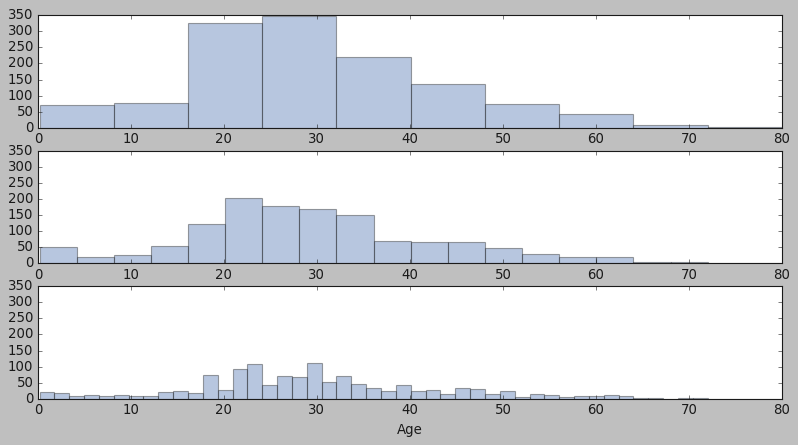

In [114]:
fig,ax=plt.subplots(3,1,sharex=False,sharey=True)
sns.distplot(df.Age,bins=10,kde=False,ax=ax[0])
sns.distplot(df.Age,bins=20,kde=False,ax=ax[1])
sns.distplot(df.Age,bins=50,kde=False,ax=ax[2])
plt.show()

#### Whether the bin size affects your plot? Why?

Yes, more bins means each bin is smaller 

#### Use seaborn to show the distribution of the column `Age`

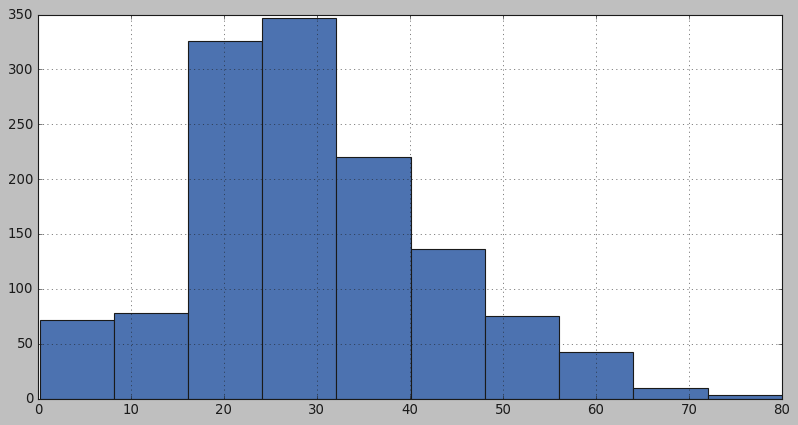

In [93]:
#Done last past ex, now using pandas visualization
df.Age.hist();

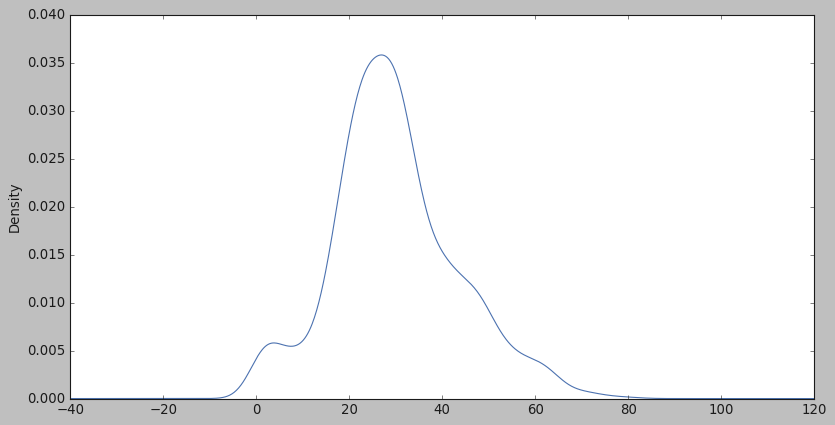

In [94]:
df.Age.plot(kind='kde');

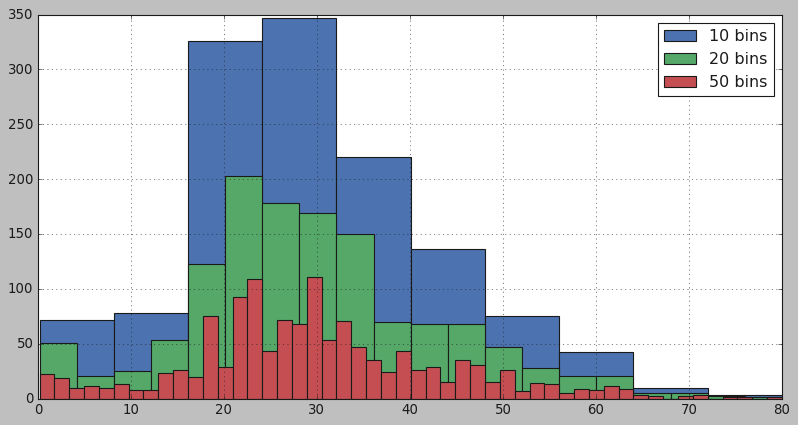

In [87]:
fig,ax=plt.subplots(1,1,sharex=False,sharey=True)
df.Age.hist(bins=10,ax=ax,label='10 bins')
df.Age.hist(bins=20,ax=ax,label='20 bins')
df.Age.hist(bins=50,ax=ax,label='50 bins')
ax.legend(fontsize='large')
plt.show()

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

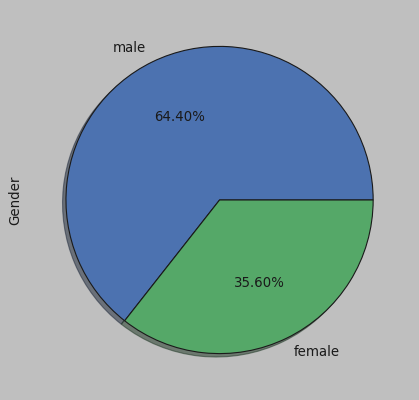

In [165]:
df.Gender.value_counts().plot.pie(autopct='%.2f%%',shadow=True);

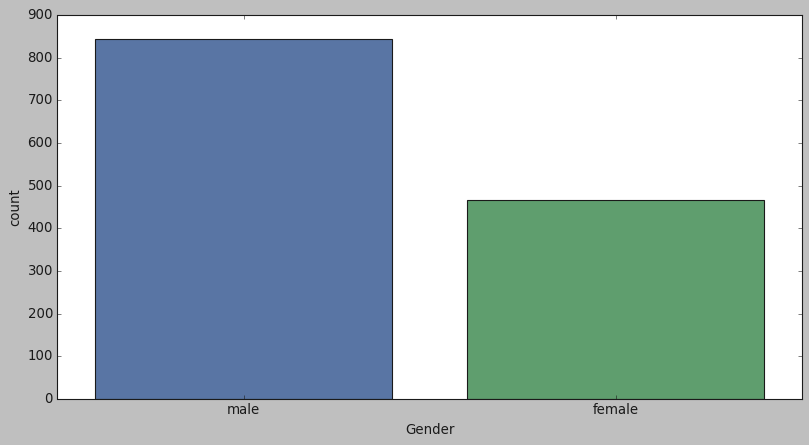

In [150]:
sns.countplot(df.Gender);

#### Use the appropriate plot to visualize the column `Pclass` 


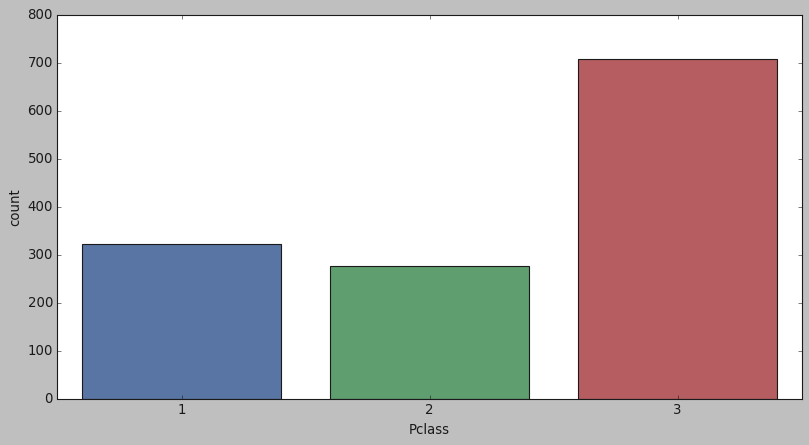

In [260]:
#Weird 2nd class is lower than 1st class
sns.countplot(df.Pclass);

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

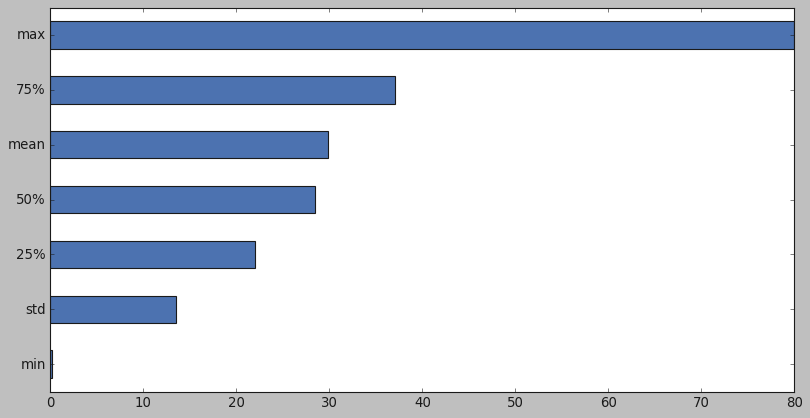

In [189]:
df.Age.describe()[1:].sort_values().plot.barh();

#### What does the previous plot tell you about the feature `Age`? Comment.

Most people were between 20 and 40 years old

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

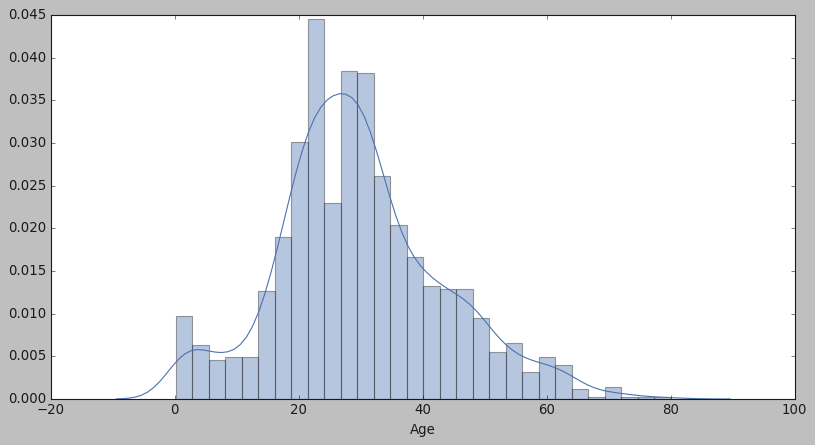

In [193]:
sns.distplot(df.Age);

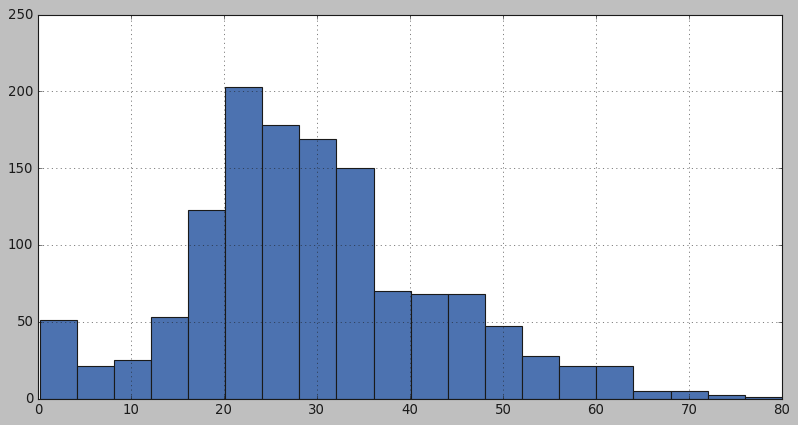

In [192]:
df.Age.hist(bins=20);

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

There were more babies than kids, actually most people were between 20 and 30 years old

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

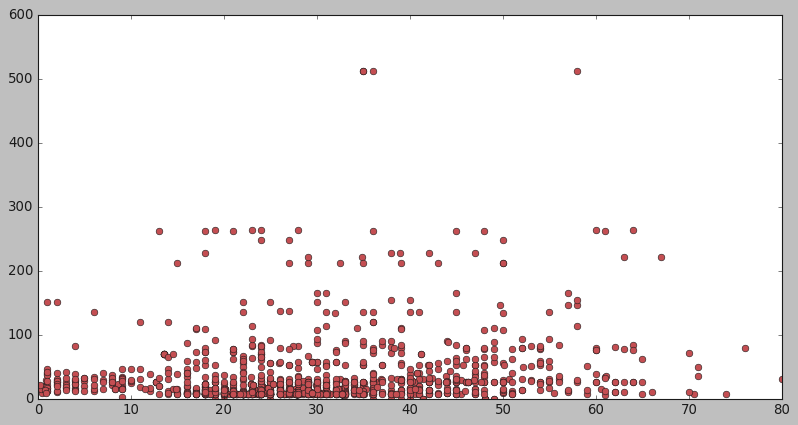

In [223]:
plt.plot(df.Age,df.Fare,'ro');

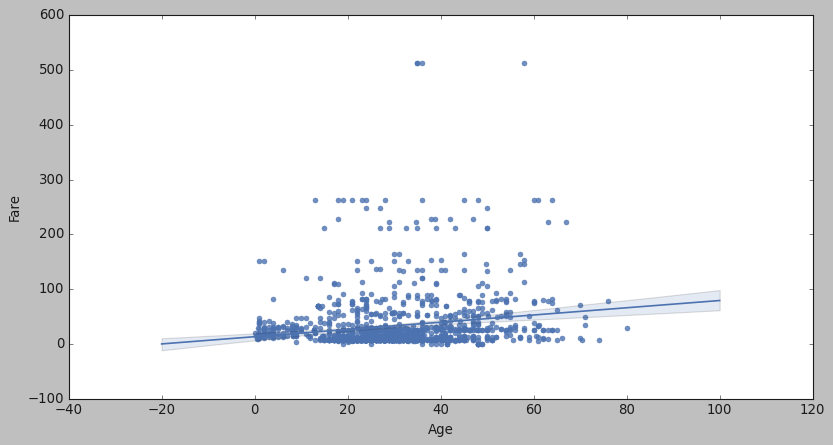

In [259]:
# doesn't seem that linear
sns.regplot('Age','Fare',df);

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

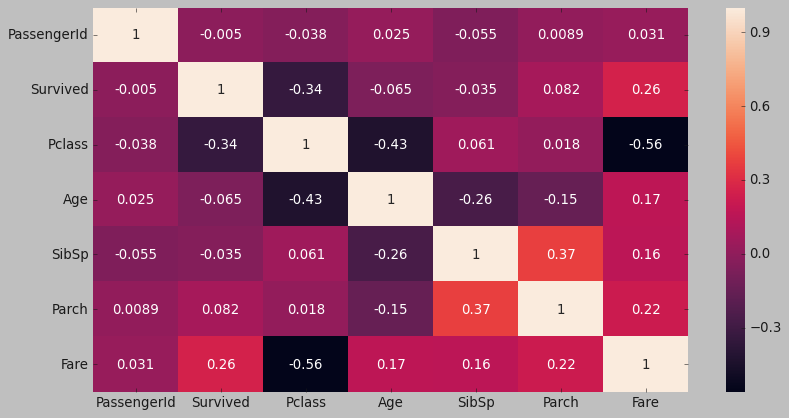

In [234]:
sns.heatmap(df.corr(),annot=True);

#### According to the previous plot, what are the most correlated feature? Comment.

Pclass-Fare, Pclass-Age, SibSp-Parch, Pclass-Survived

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

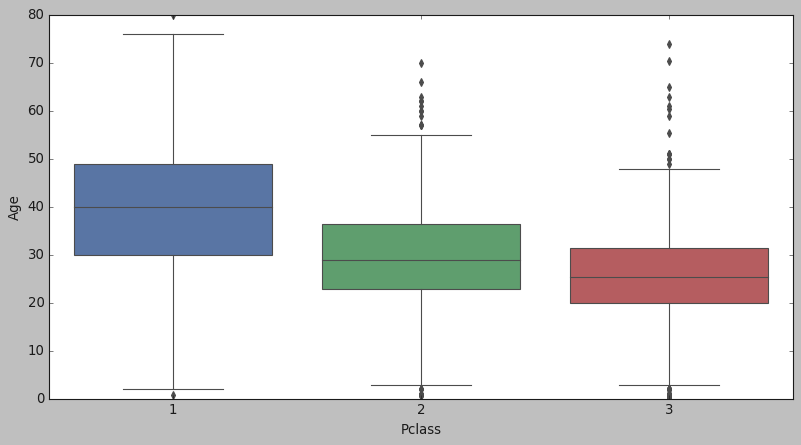

In [257]:
#young=poor?:c
sns.boxplot(df.Pclass,df.Age);

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

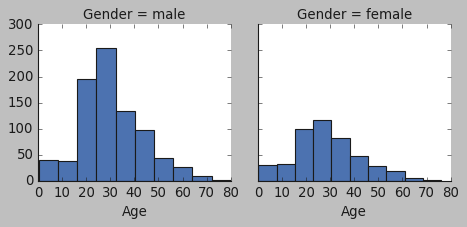

In [258]:
#similar distribution but way more males than females
g=sns.FacetGrid(df,col='Gender')
f = g.map(plt.hist, "Age")

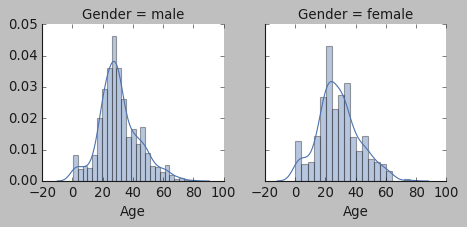

In [261]:
g=sns.FacetGrid(df,col='Gender')
f = g.map(sns.distplot, "Age")